In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [ ]:
# Define transform to normalize data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)

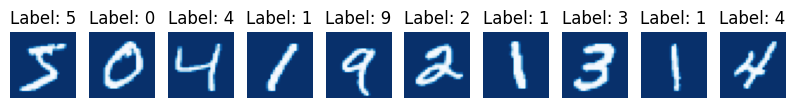

In [ ]:

# Function to visualize images from the dataset
def visualize_dataset(dataset, num_images=10):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        image, label = dataset[i]
        plt.subplot(1, num_images, i + 1)
        plt.imshow(image.squeeze(), cmap='Blues_r')  # Squeeze to remove the channel dimension
        plt.title('Label: {}'.format(label))
        plt.axis('off')
    plt.show()

# Visualize some images from the training dataset
visualize_dataset(train_dataset, num_images=10)

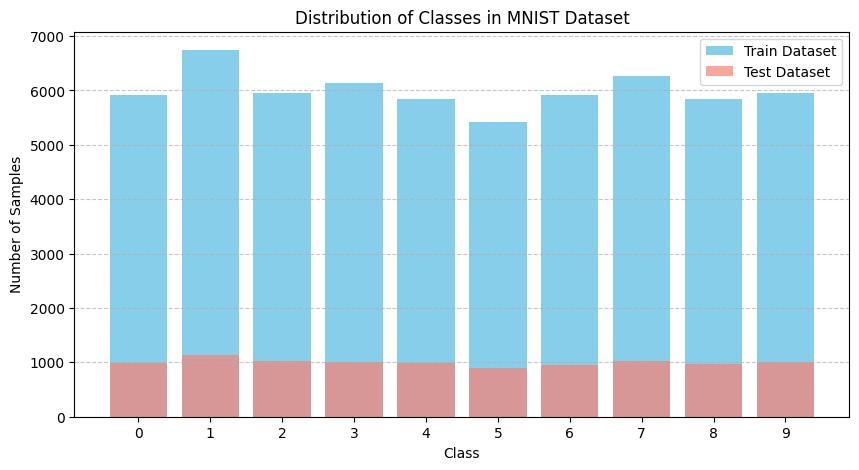

In [ ]:
# Count the number of samples in each class
class_counts_train = [0] * 10
for _, label in train_dataset:
    class_counts_train[label] += 1

class_counts_test = [0] * 10
for _, label in test_dataset:
    class_counts_test[label] += 1

# Plot the distribution of classes
plt.figure(figsize=(10, 5))
plt.bar(range(10), class_counts_train, color='skyblue', label='Train Dataset')
plt.bar(range(10), class_counts_test, color='salmon', label='Test Dataset', alpha=0.7)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Distribution of Classes in MNIST Dataset')
plt.xticks(range(10))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

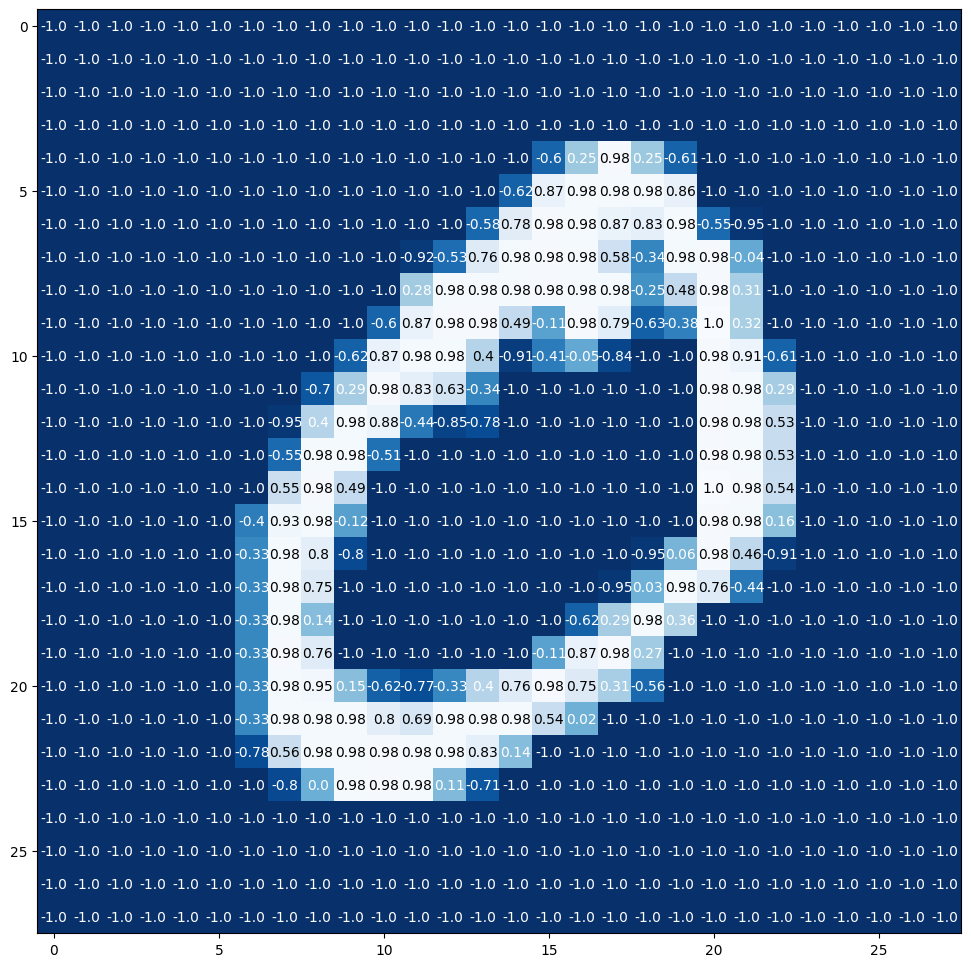

In [ ]:
import matplotlib.pyplot as plt

# Select the second image from the dataset and reshape it to 28x28
image_data, label = train_dataset[1]
img = image_data.numpy().reshape((28, 28))

# Create a plot
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
ax.imshow(img, cmap='Blues_r')

# Determine threshold for annotation color
thresh = img.max() / 2.5

# Annotate each pixel with its value
width, height = img.shape
for x in range(width):
    for y in range(height):
        val = round(img[x][y], 2) if img[x][y] != 0 else 0
        ax.annotate(str(val), xy=(y, x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y] < thresh else 'black')

plt.show()

In [ ]:
from sklearn import svm
# Train SVM model
X_train = train_dataset.data.view(-1, 28*28).numpy()
y_train = train_dataset.targets.numpy()

svm_model = svm.SVC(kernel='rbf')
svm_model.fit(X_train, y_train)

# Evaluate SVM model
X_test = test_dataset.data.view(-1, 28*28).numpy()
y_test = test_dataset.targets.numpy()

svm_accuracy = svm_model.score(X_test, y_test)
print('SVM Accuracy: {:.2f}%'.format(svm_accuracy * 100))

SVM Accuracy: 97.92%


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


# Make predictions
y_pred = svm_model.predict(X_test)

# Calculate accuracy
svm_accuracy = svm_model.score(X_test, y_test)
print('SVM Accuracy: {:.2f}%'.format(svm_accuracy * 100))

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

SVM Accuracy: 97.92%
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Confusion Matrix:
[[ 973    0    1    0    0    2    1    1    2    0]
 [   0 1126    3    1    0    1    1    1    2    0]
 [   6    1 1006    2    1    0    2    7    6    1]
 [   0    0    2  99

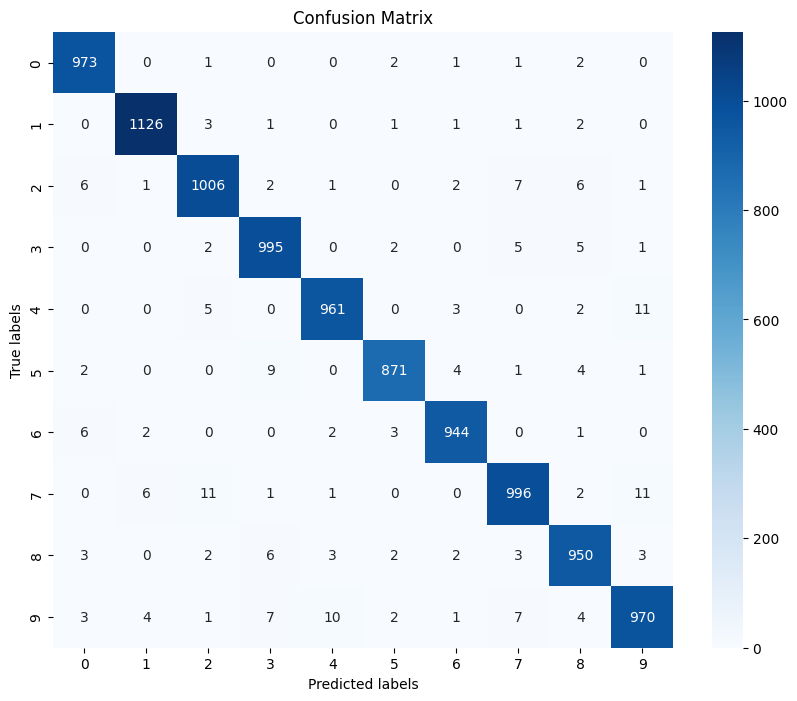

In [ ]:
import seaborn as sns
# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()